In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [10]:
y_pred= clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6293706293706294

In [12]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(DecisionTreeClassifier(),X, y, cv=10, scoring='accuracy'))

np.float64(0.6373239436619718)

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [14]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1]),
    
])

In [15]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [16]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [23]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,-1]
})

In [24]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [25]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [26]:
output['age_labels']

328    (30.0, 32.0]
73     (25.0, 28.0]
253    (28.0, 30.0]
719    (32.0, 35.0]
666    (23.0, 25.0]
           ...     
92     (42.0, 47.0]
134    (23.0, 25.0]
337    (38.0, 42.0]
548    (32.0, 35.0]
130    (32.0, 35.0]
Name: age_labels, Length: 571, dtype: category
Categories (15, interval[float64, right]): [(0.42, 6.0] < (6.0, 16.0] < (16.0, 19.0] < (19.0, 21.0] ... (38.0, 42.0] < (42.0, 47.0] < (47.0, 54.0] < (54.0, 80.0]]

In [27]:
output.sample(5)


,age,age_trf,fare,fare_trf,age_labels,fare_labels
479,2.0,0.0,12.2875,5.0,"(0.42, 6.0]","(10.5, 13.0]"
189,36.0,10.0,7.8958,3.0,"(35.0, 38.0]","(7.775, 7.896]"
795,39.0,11.0,13.0000,6.0,"(38.0, 42.0]","(10.5, 13.0]"
88,23.0,5.0,263.0000,14.0,"(21.0, 23.0]","(108.9, 512.329]"
605,36.0,10.0,15.5500,7.0,"(35.0, 38.0]","(14.454, 18.75]"


In [28]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [29]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [30]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6261150234741784)

In [31]:

def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6317097026604068


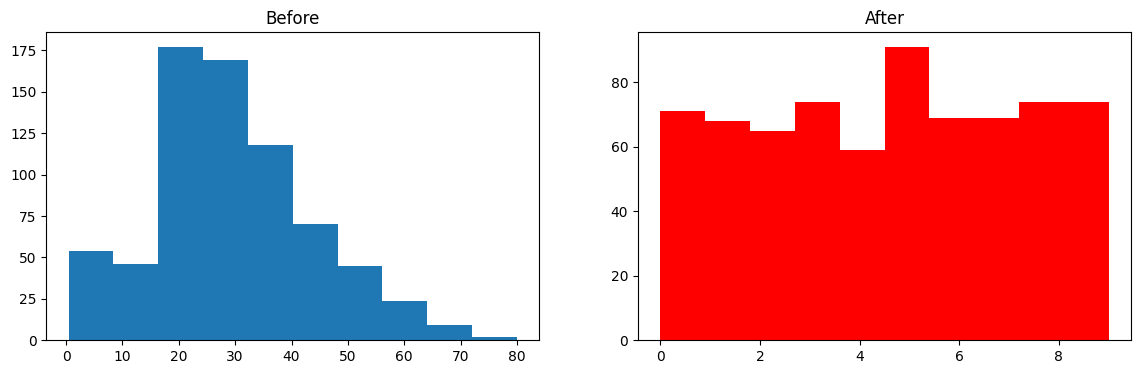

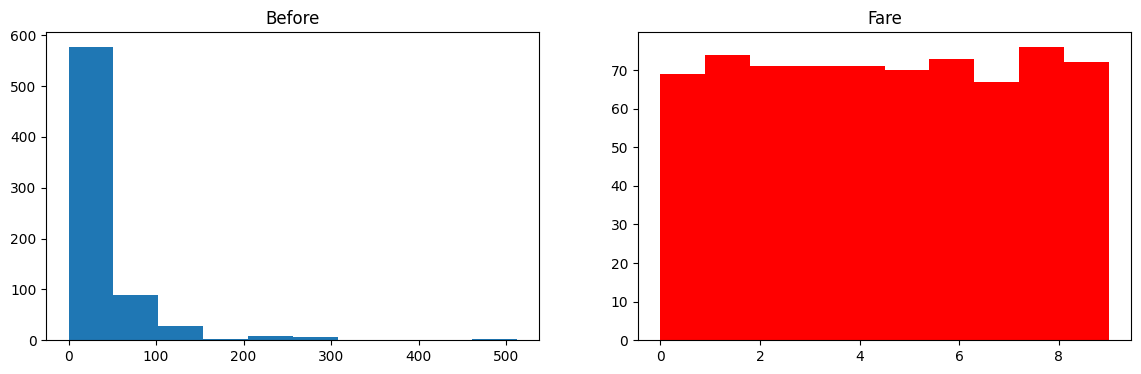

In [33]:
discretize(10,'quantile')

0.6317097026604068


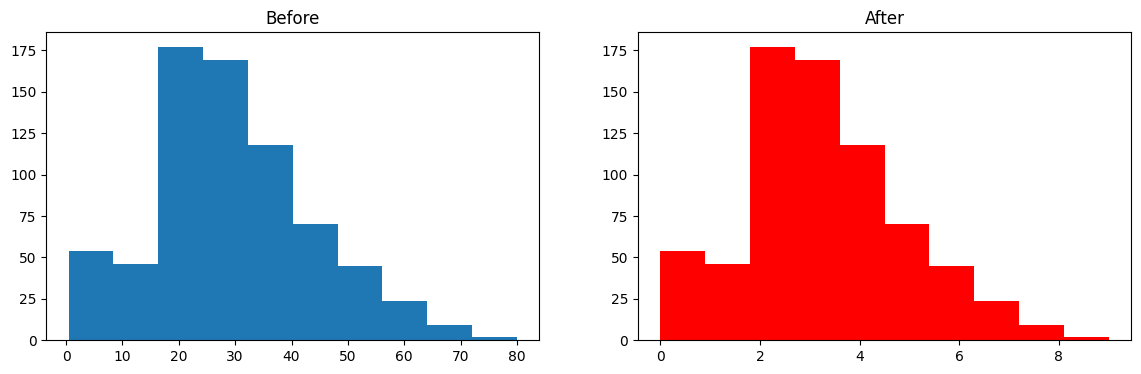

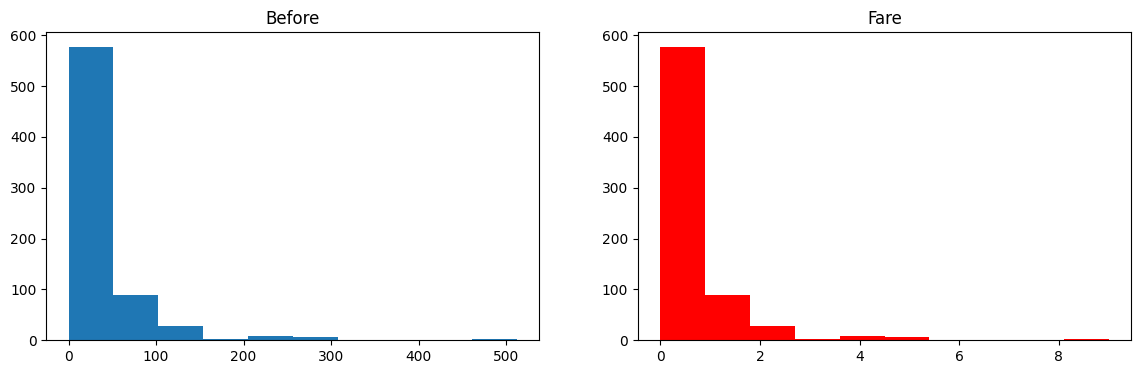

In [34]:
discretize(10,'uniform')

0.6316901408450704


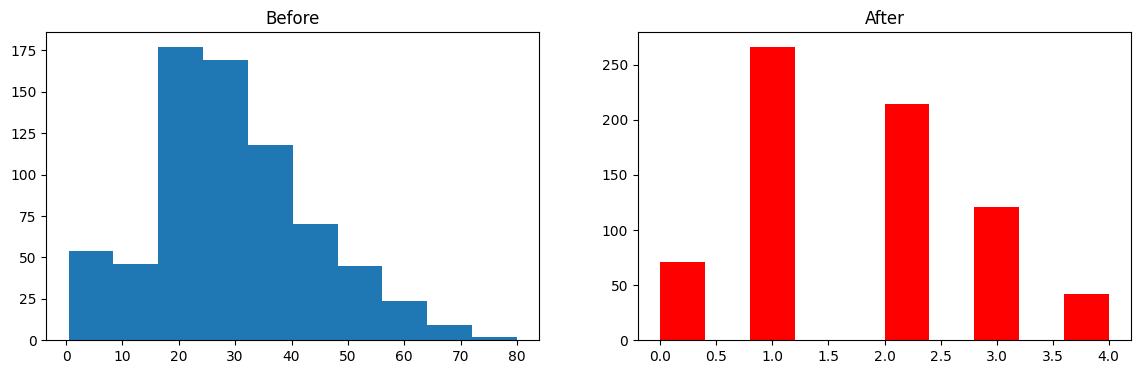

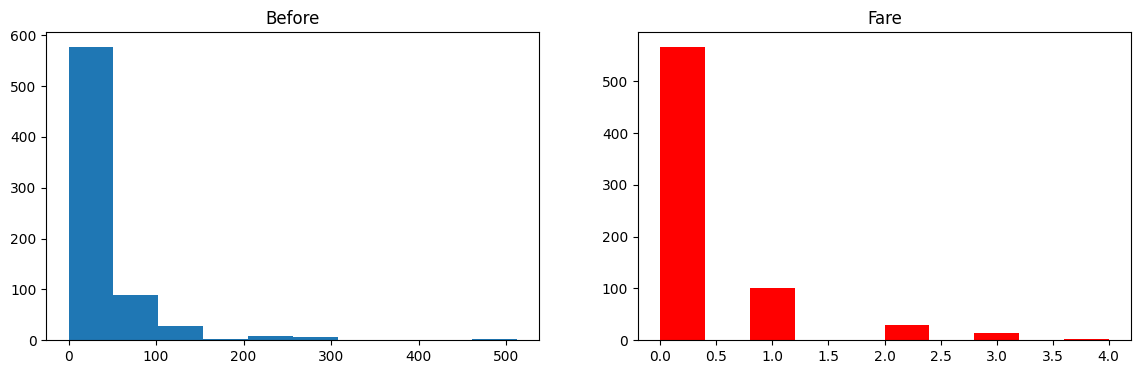

In [32]:
discretize(5,'kmeans')